In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('fitflow.csv')
colormap1 = ['#FFB6C1', '#ADD8E6', '#D8B7FF']
colormap2 = ['#BAC8f9', '#0CC0DF', '#C8B3EE', '#AECfB4']

# 🔎Initial Data Exploration 

In [93]:
df.head(5)

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   participant_id            687701 non-null  int64  
 1   date                      687701 non-null  object 
 2   age                       687701 non-null  int64  
 3   gender                    687701 non-null  object 
 4   height_cm                 687701 non-null  float64
 5   weight_kg                 687701 non-null  float64
 6   activity_type             687701 non-null  object 
 7   duration_minutes          687701 non-null  int64  
 8   intensity                 687701 non-null  object 
 9   calories_burned           687701 non-null  float64
 10  avg_heart_rate            687701 non-null  int64  
 11  hours_sleep               687701 non-null  float64
 12  stress_level              687701 non-null  int64  
 13  daily_steps               687701 non-null  i

In [95]:
df.columns

Index(['participant_id', 'date', 'age', 'gender', 'height_cm', 'weight_kg',
       'activity_type', 'duration_minutes', 'intensity', 'calories_burned',
       'avg_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps',
       'hydration_level', 'bmi', 'resting_heart_rate',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'health_condition', 'smoking_status', 'fitness_level'],
      dtype='object')

In [96]:
df.shape

(687701, 22)

In [97]:
df.isnull().sum()

participant_id                   0
date                             0
age                              0
gender                           0
height_cm                        0
weight_kg                        0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
avg_heart_rate                   0
hours_sleep                      0
stress_level                     0
daily_steps                      0
hydration_level                  0
bmi                              0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
health_condition            490275
smoking_status                   0
fitness_level                    0
dtype: int64

## ⭕Handling Missing Values

In [98]:
null_percentage = df['health_condition'].isnull().mean() * 100
print(f"Null percentage: {null_percentage:.2f}%")

Null percentage: 71.29%


In [99]:
df['health_condition'].value_counts(dropna=False)


health_condition
NaN             490275
Hypertension     99437
Diabetes         64754
Asthma           33235
Name: count, dtype: int64

In [100]:
df['health_condition'] = df['health_condition'].fillna('No Health Condition')
df.isnull().sum()

participant_id              0
date                        0
age                         0
gender                      0
height_cm                   0
weight_kg                   0
activity_type               0
duration_minutes            0
intensity                   0
calories_burned             0
avg_heart_rate              0
hours_sleep                 0
stress_level                0
daily_steps                 0
hydration_level             0
bmi                         0
resting_heart_rate          0
blood_pressure_systolic     0
blood_pressure_diastolic    0
health_condition            0
smoking_status              0
fitness_level               0
dtype: int64

# 👩🏽👨🏽 1. Demographic Analysis 

## 4️⃣2️⃣ 1.1 Age Distribution

count    687701.000000
mean         41.658602
std          13.581770
min          18.000000
25%          30.000000
50%          42.000000
75%          53.000000
max          64.000000
Name: age, dtype: float64


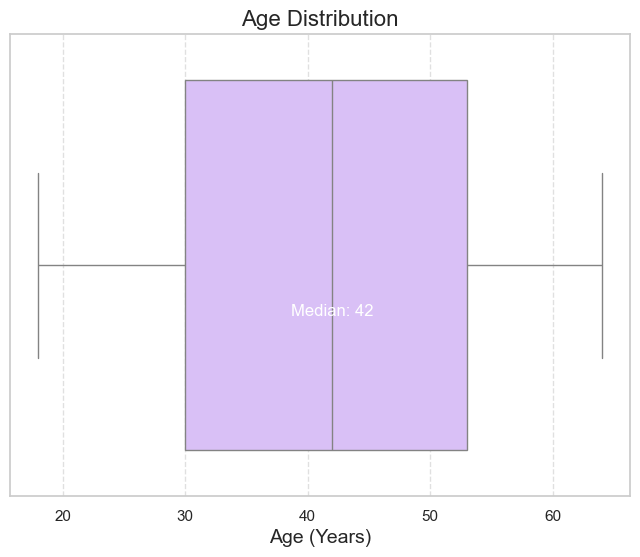

In [101]:
# Summary Statistics for Age column
print(df['age'].describe())

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'], color='#D8B7FF')
# Median
median_age = df['age'].median()
plt.text(median_age, 0.1, f"Median: {median_age:.0f}", color='white', ha='center', va='center')

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age (Years)', fontsize=14, )
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

🔎
- The age in this dataset has a mean of 41.66 years, with a fairly wide spread (standard deviation of 13.58). Most participants are between the ages of 18 and 64, with the median age being 42, and the majority falling between 30 and 53. 

## 🚻 1.2 Gender Distribution 

gender
F        338856
M        334023
Other     14822
Name: count, dtype: int64


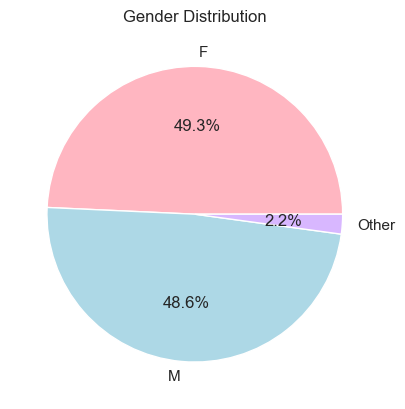

In [102]:
# Count the occurrences of each gender in the dataset
gender_counts = df['gender'].value_counts()
print(gender_counts)
colors = [colormap1[i] for i, gender in enumerate(gender_counts.index)]

# Set the style for the plot to a white grid background
sns.set(style="whitegrid")

# Create a pie chart to show gender distribution, using colormap1 for colors
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)

# Add a title to the pie chart
plt.title("Gender Distribution")

# Display the pie chart
plt.show()

🔎
- **Females (F):** There are 338,856 female entries, which is the largest group in the dataset. This suggests that the majority of participants or individuals in the data are women.
- **Males (M):** There are 334,023 male entries, which is a close second to females. The gender distribution appears fairly balanced between males and females.
- **Other:** There are 14,822 entries classified as "Other," which represents a much smaller portion of the dataset. This could include individuals who identify as non-binary or another gender outside the traditional male/female categories.

## 🚻👨🏽1.3 Age by Gender

gender                  F       M  Other
age_category                            
Adult               76642   66561   2772
Middle-Aged Adult   72824   72123   2751
Older Adult        104242  108787   5596
Young Adult         85148   86552   3703


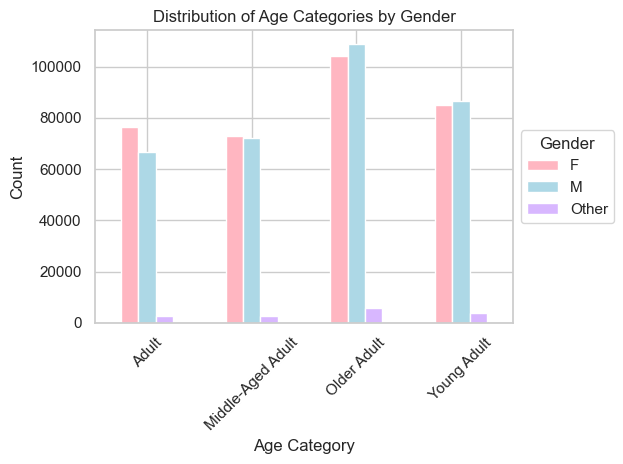

In [103]:
# Categorizing Age 
def categorize_age(age):
    if 18 <= age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 40:
        return 'Adult'
    elif 41 <= age <= 50:
        return 'Middle-Aged Adult'
    elif 51 <= age <= 64:
        return 'Older Adult'
    else:
        return 'Out of range'  
df['age_category'] = df['age'].apply(categorize_age)
# Grouping the dataset by 'age_category' and 'gender', then counting the occurrences of each combination
age_gender_dist = df.groupby(['age_category', 'gender']).size().unstack()

# Print the resulting distribution of gender across age categories
print(age_gender_dist)

# Plot the data as a bar chart with different colors for each gender (using the colormap1)
age_gender_dist.plot(kind='bar', color=colormap1)

# Add a title to the plot
plt.title('Distribution of Age Categories by Gender')

# Label the x-axis as 'Age Category'
plt.xlabel('Age Category')

# Label the y-axis as 'Count' to show the number of occurrences in each age and gender group
plt.ylabel('Count')

# Add a legend to the plot to differentiate between genders, placing it to the right of the plot
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Rotate the x-axis labels by 45 degrees to make them more readable
plt.xticks(rotation=45)

# Adjust the layout to ensure the elements don't overlap
plt.tight_layout()

# Display the plot
plt.show()


🔎
- **Young Adult:** Males have a slightly higher representation in the "Young Adult" category, though the gap is small. The "Other" category still has a smaller presence, though higher than in the "Adult" category.
- Adult:  Females are slightly more represented in the "Adult" category compared to males, but the gap is not very wide. The "Other" category represents a smaller proportion in this age group.
- **Middle-Aged Adult:** The distribution between males and females in the "Middle-Aged Adult" category is nearly equal, with a very small difference. The "Other" category remains relatively small.
- **Older Adult:** There are more males than females in the "Older Adult" category, which contrasts with the trend seen in younger age categories. The "Other" category also has a slightly larger representation here compared to other age categories.

## 🩺 1.4 BMI Categories

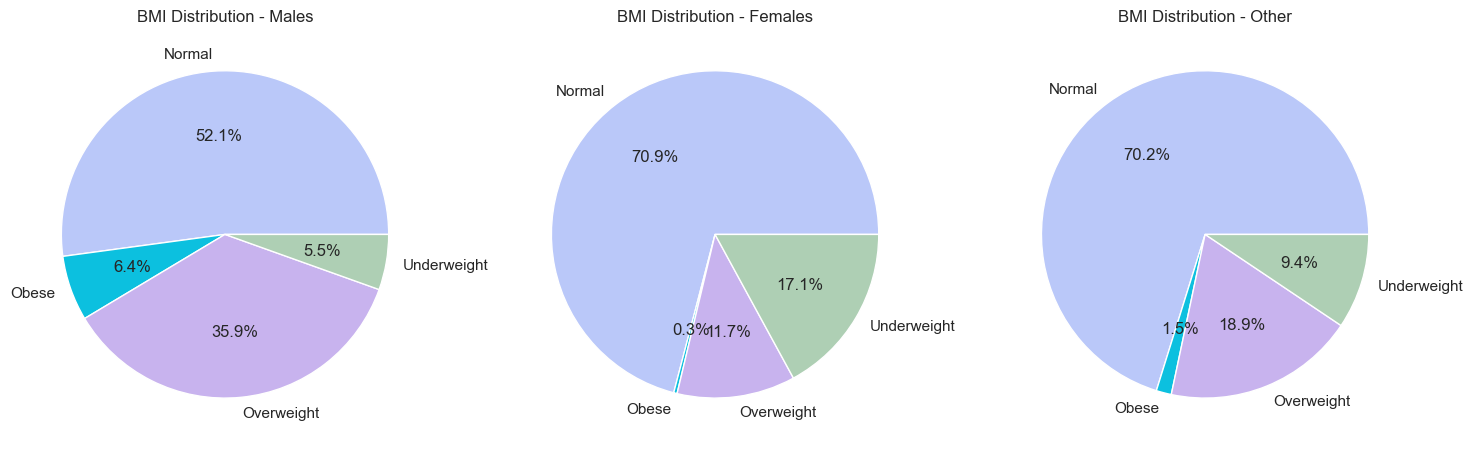

In [104]:
# Categorizing Bmi 
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight' 
    else:
        return 'Obese'

# Apply BMI categorization
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

bmi_bygender = pd.crosstab([df['bmi_category'], df['age_category']], df['gender'])

# Create a figure with subplots for Males, Females, and Other
plt.figure(figsize=(15, 8))

# Plot pie chart for Males
plt.subplot(1, 3, 1)
male_data = bmi_bygender['M'].groupby(level=0).sum()
plt.pie(male_data, labels=male_data.index, autopct='%1.1f%%', colors=colormap2[:len(male_data)])
plt.title('BMI Distribution - Males')

# Plot pie chart for Females
plt.subplot(1, 3, 2)
female_data = bmi_bygender['F'].groupby(level=0).sum()
plt.pie(female_data, labels=female_data.index, autopct='%1.1f%%', colors=colormap2[:len(female_data)])
plt.title('BMI Distribution - Females')

# Plot pie chart for Other
plt.subplot(1, 3, 3)
other_data = bmi_bygender['Other'].groupby(level=0).sum()
plt.pie(other_data, labels=other_data.index, autopct='%1.1f%%', colors=colormap2[:len(other_data)])
plt.title('BMI Distribution - Other')

plt.tight_layout()
plt.show()



🔎 
- We have a high number of individuals in the "Normal" category, particularly in the "Older Adult" and "Adult" age categories. More women are in the "Normal" and "Underweight" categories, while more men are in the "Obese" and "Overweight" categories, especially in the middle-aged group.

## 🚬 1.5 Smoking Status 

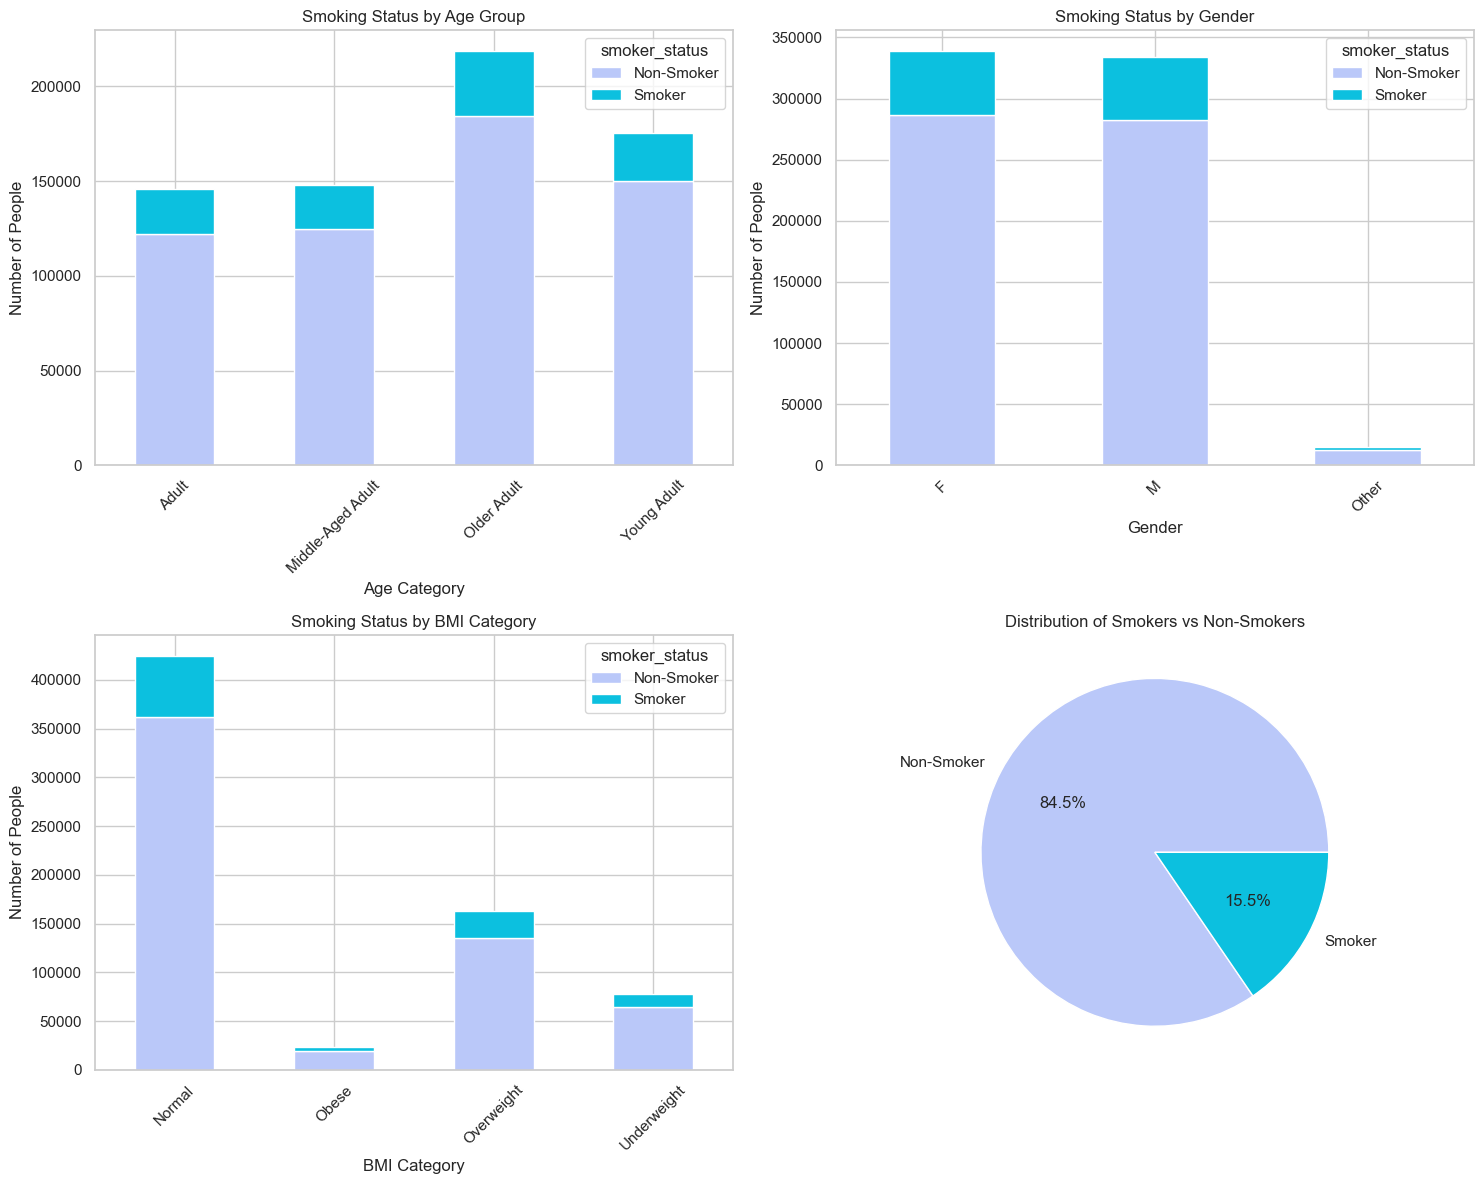

In [105]:
# Categorizing smokers vs non-smokers 
df['smoker_status'] = df['smoking_status'].apply(lambda x: 'Smoker' if x == 'Current' else 'Non-Smoker')

# Grouping data
smoker_by_age = df.groupby(['age_category', 'smoker_status']).size().unstack(fill_value=0)
smoker_by_gender = df.groupby(['gender', 'smoker_status']).size().unstack(fill_value=0)
smoker_by_bmi = df.groupby(['bmi_category', 'smoker_status']).size().unstack(fill_value=0)
smoking_distribution = df['smoker_status'].value_counts(normalize=True) * 100

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot Smoking Status by Age Group
smoker_by_age.plot(kind='bar', stacked=True, color=colormap2, ax=axes[0, 0])
axes[0, 0].set_title('Smoking Status by Age Group')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Number of People')
axes[0, 0].set_xticklabels(smoker_by_age.index, rotation=45)

# Plot Smoking Status by Gender
smoker_by_gender.plot(kind='bar', stacked=True, color=colormap2, ax=axes[0, 1])
axes[0, 1].set_title('Smoking Status by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Number of People')
axes[0, 1].set_xticklabels(smoker_by_gender.index.get_level_values(0), rotation=45)

# Plot Smoking Status by BMI Category
smoker_by_bmi.plot(kind='bar', stacked=True, color=colormap2, ax=axes[1, 0])
axes[1, 0].set_title('Smoking Status by BMI Category')
axes[1, 0].set_xlabel('BMI Category')
axes[1, 0].set_ylabel('Number of People')
axes[1, 0].set_xticklabels(smoker_by_bmi.index, rotation=45)

# Plot Smoking Distribution (Pie Chart)
axes[1, 1].pie(smoking_distribution, labels=smoking_distribution.index, autopct='%1.1f%%', colors=colormap2)
axes[1, 1].set_title('Distribution of Smokers vs Non-Smokers')

# Adjust layout
plt.tight_layout()
plt.show()


🔎 
- The data reveals that across all age categories, genders, and BMI categories, the proportion of non-smokers consistently outweighs that of smokers. The percentage of smokers is relatively low, ranging from around 14% to 16%, while non-smokers account for 83% to 85%. The trend is similar across age categories, with young adults showing the highest percentage of non-smokers (85.5%) and the lowest percentage of smokers (14.5%). Gender and BMI category comparisons show slight variations, but overall, the data suggests that non-smoking behavior is predominant in the population, regardless of age, gender, or BMI.

# 🤸🏽‍♀️2. Physical Activity

## 👩🏽🤸🏽‍♀️2.1 Activity Type Popularity 

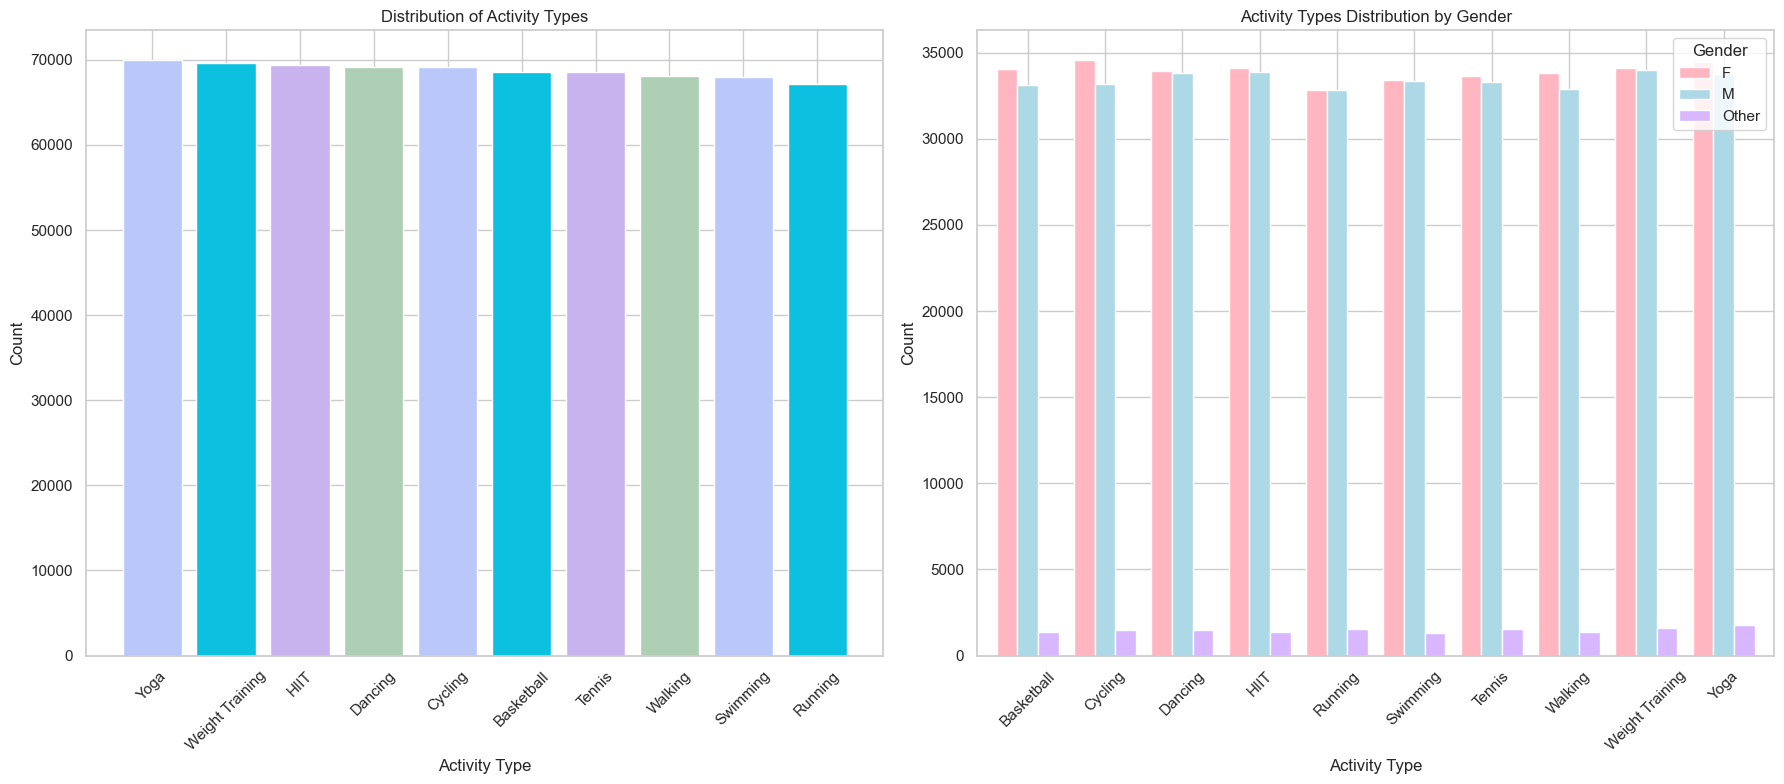

In [106]:
activity_counts = df["activity_type"].value_counts()
activity_type_bygender = df.groupby(['activity_type', 'gender']).size().unstack()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the distribution of activity types
axes[0].bar(activity_counts.index, activity_counts.values, color=colormap2)
axes[0].set_title('Distribution of Activity Types')
axes[0].set_xlabel('Activity Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot the activity types by gender
activity_type_bygender.plot(kind='bar', width=0.8, color=colormap1, ax=axes[1])
axes[1].set_title('Activity Types Distribution by Gender')
axes[1].set_xlabel('Activity Type')
axes[1].set_ylabel('Count')
axes[1].legend(title='Gender')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

🔎
- The data highlights participation trends in various activity types, segmented by gender. Females and males show nearly equal participation across most activities, with percentages hovering around **49% each**, indicating **balanced engagement**. However, activities such as **Cycling and Walking** show a slight **preference among females**, while **Basketball and Weight Training** lean marginally toward **male participation**. Notably, the **"Other" gender group** consistently accounts for around **2-2.5%** of participants, with the **highest representation in Yoga (2.52%) and Tennis (2.28%)**, suggesting these activities may appeal more to non-binary or non-conforming individuals. Overall, the data reveals **minimal gender disparities**, but the relatively lower representation of the **"Other" category highlights an opportunity to foster inclusivity and engagement within this group, particularly in less-represented activities**.


In [107]:
activity_type_byage = df.groupby(['activity_type', 'age_category']).size().unstack()
activity_type_byage_percentage = activity_type_byage.div(activity_type_byage.sum(axis=1), axis=0) * 100
print(activity_type_byage)
print(activity_type_byage_percentage)

age_category     Adult  Middle-Aged Adult  Older Adult  Young Adult
activity_type                                                      
Basketball       14692              14838        21701        17305
Cycling          14790              14656        21910        17831
Dancing          15510              14651        21983        17049
HIIT             14308              15262        21939        17867
Running          14157              14660        21343        16985
Swimming         14063              14778        21674        17517
Tennis           14381              14314        21908        17930
Walking          14323              14946        21836        16972
Weight Training  14684              14965        21957        18055
Yoga             15067              14628        22374        17892
age_category         Adult  Middle-Aged Adult  Older Adult  Young Adult
activity_type                                                          
Basketball       21.436909          21.6

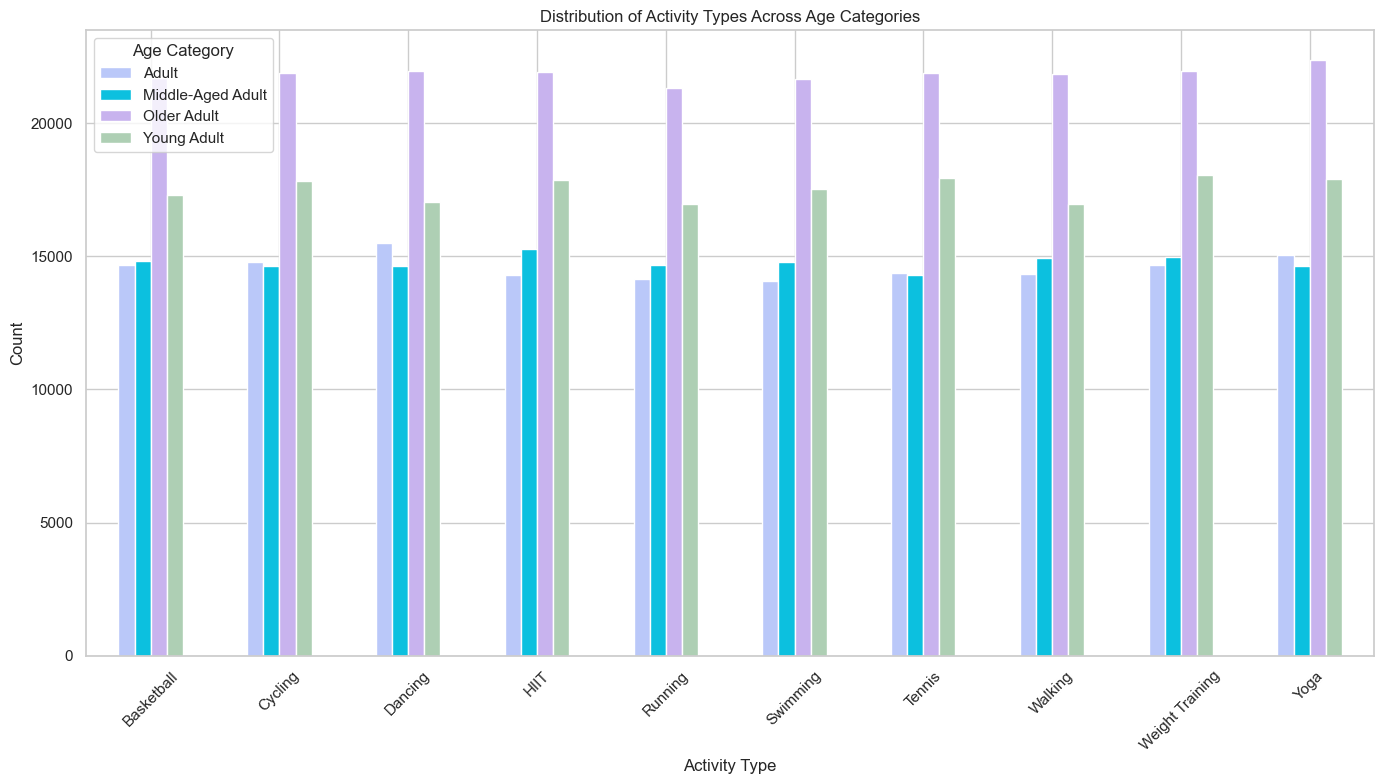

In [108]:
# Plot the distribution of activity types across different age categories
activity_type_byage.plot(kind='bar', figsize=(14, 8), color=colormap2)

# Add a title to the plot
plt.title('Distribution of Activity Types Across Age Categories')

# Label the x-axis as 'Activity Type'
plt.xlabel('Activity Type')

# Label the y-axis as 'Count'
plt.ylabel('Count')

# Rotate the x-axis labels by 45 degrees to make them more readable
plt.xticks(rotation=45)

# Add a legend to the plot to differentiate between age categories
plt.legend(title='Age Category')

# Adjust the layout to ensure the elements don't overlap
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the distribution of activity types
axes[0, 0].bar(activity_counts.index, activity_counts.values, color=colormap2)
axes[0, 0].set_title('Distribution of Activity Types')
axes[0, 0].set_xlabel('Activity Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot the activity types by gender
activity_type_bygender.plot(kind='bar', width=0.8, color=colormap1, ax=axes[0, 1])
axes[0, 1].set_title('Activity Types Distribution by Gender')
axes[0, 1].set_xlabel('Activity Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Gender')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot the distribution of activity types across different age categories
activity_type_byage.plot(kind='bar', color=colormap2, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Activity Types Across Age Categories')
axes[1, 0].set_xlabel('Activity Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Age Category')

# Plot the percentage distribution of activity types across different age categories
activity_type_byage_percentage.plot(kind='bar', stacked=True, color=colormap2, ax=axes[1, 1])
axes[1, 1].set_title('Percentage Distribution of Activity Types Across Age Categories')
axes[1, 1].set_xlabel('Activity Type')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Age Category')

# Adjust layout
plt.tight_layout()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

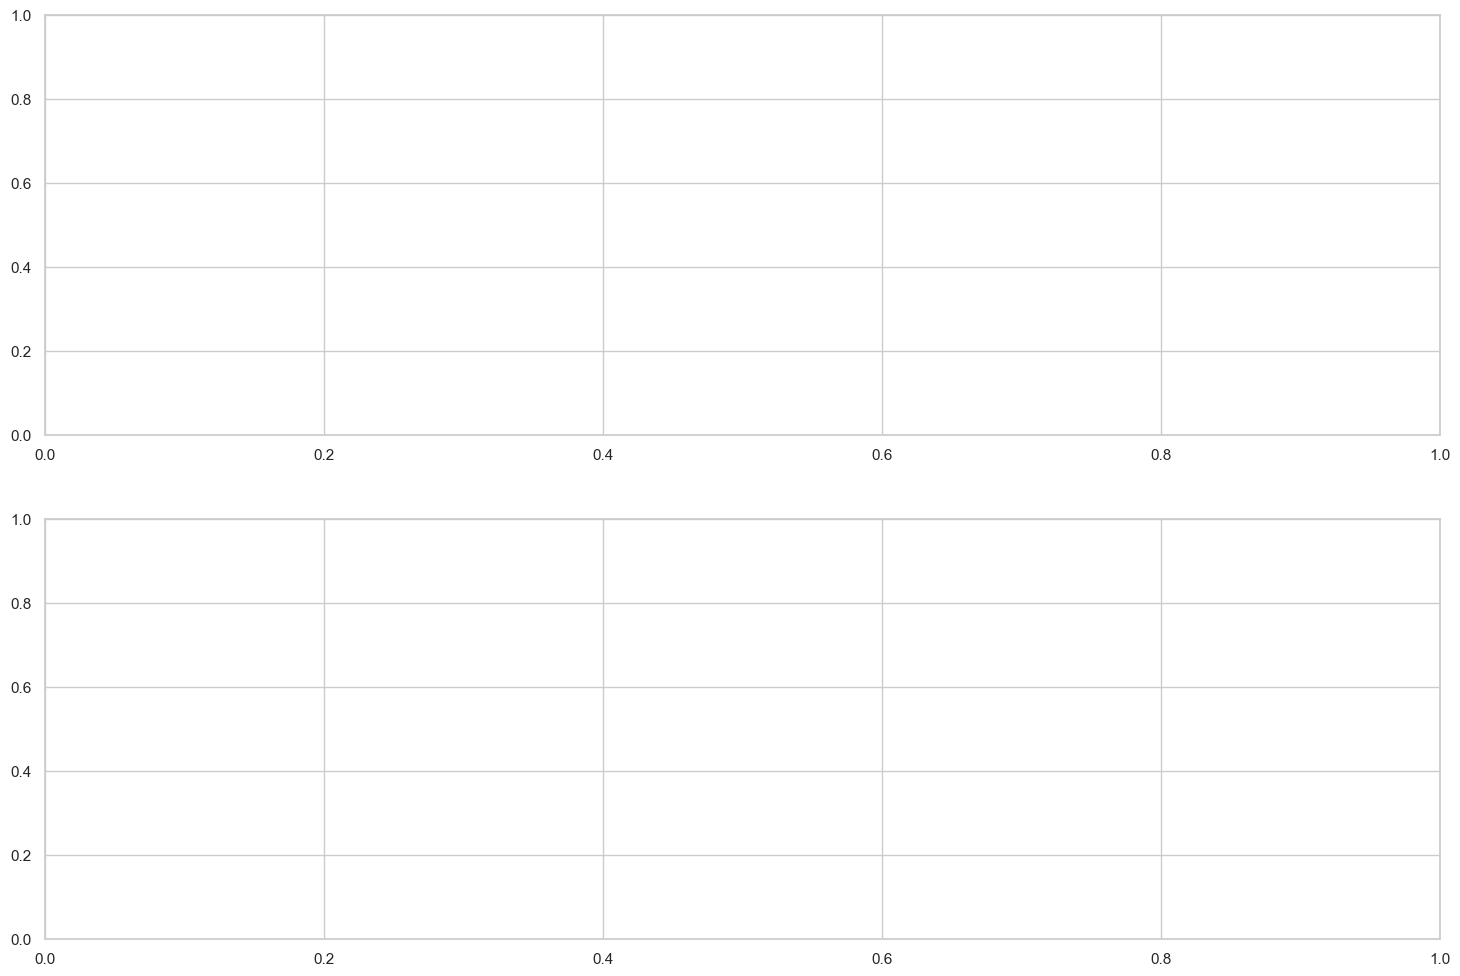

In [112]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Plot the distribution of activity types
axes[0, 0].bar(activity_counts.index, activity_counts.values, color=colormap2)
axes[0, 0].set_title('Distribution of Activity Types')
axes[0, 0].set_xlabel('Activity Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot the activity types by gender
activity_type_bygender.plot(kind='bar', width=0.8, color=colormap1, ax=axes[0, 1])
axes[0, 1].set_title('Activity Types Distribution by Gender')
axes[0, 1].set_xlabel('Activity Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Gender')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot the distribution of activity types across different age categories
activity_type_byage.plot(kind='bar', color=colormap2, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Activity Types Across Age Categories')
axes[1, 0].set_xlabel('Activity Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Age Category')

plt.tight_layout()
plt.show()

## 🔥🤸🏽‍♀️2.2 Duration vs. Calories Burned

In [109]:
df.columns

Index(['participant_id', 'date', 'age', 'gender', 'height_cm', 'weight_kg',
       'activity_type', 'duration_minutes', 'intensity', 'calories_burned',
       'avg_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps',
       'hydration_level', 'bmi', 'resting_heart_rate',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'health_condition', 'smoking_status', 'fitness_level', 'age_category',
       'bmi_category', 'smoker_status'],
      dtype='object')